In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
res = [1.031,0.998,1.052,1.019,1.023,1.036,1.025,1.038,1.029,1.002]
data = pd.Series(res)
print('Média:',data.mean())
print('Variância:',data.var())
print('Desvio padrão:',data.var()**0.5)
print('Mediana:',data.median())

Média: 1.0253
Variância: 0.000263122222222
Desvio padrão: 0.0162210425751
Mediana: 1.027


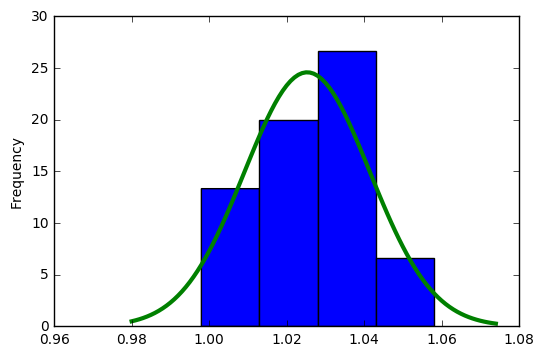

In [50]:
x = np.arange(0.98,1.075,0.001)
faixa = np.arange(0.998,1.060,0.015)
plot = data.plot.hist(bins = faixa, normed = True)
plt.plot(x,norm.pdf(x,1.0253,0.01622), lw = 3)

In [59]:
rvs = norm.rvs(1.0253,0.01622,10000)
data_2 = pd.Series(rvs)
data.describe()

count    10.000000
mean      1.025300
std       0.016221
min       0.998000
25%       1.020000
50%       1.027000
75%       1.034750
max       1.052000
dtype: float64

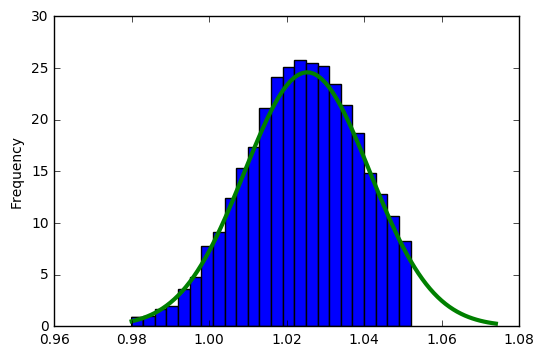

In [65]:
faixa_2 = np.arange(0.98,1.052,0.003)

hist = data_2.plot(kind = 'hist',bins = faixa_2, normed = True)
plt.plot(x,norm.pdf(x,1.0253,0.01622), lw = 3)


In [73]:
soma = 0
for i in range (len(faixa_2)):
    soma+= faixa_2[i]
    
media_teorica = soma/len(faixa_2)
print('Média teorica:',media_teorica)

soma=0
for i in range(len(faixa_2)):
    soma+= (faixa_2[i] - media_teorica)**2
variancia_teorica = soma/len(faixa_2)
print('Variância teorica:',variancia_teorica)
print('Desvio padrão teorico:',variancia_teorica**0.5)

Média teorica: 1.016
Variância teorica: 0.000468
Desvio padrão teorica: 0.0216333076528


In [75]:
def prob(x):
    z = (x - media_teorica)/ variancia_teorica**0.5
    return print('Z:',z)

In [76]:
prob(1.050)

Z: 1.57165055597


In [77]:
prob(0.950)

Z: -3.05085107924


In [90]:
valor_z1 = 0.9417
print('Probabilidade de ser maior que 1.050 -->',(1-valor_z1)*100,'%')

Probabilidade de ser maior que 1.050 --> 5.830000000000002 %


In [97]:
valor_z2 = 0.0011
print('Probabilidade de ser menor que 0.950 -->',(valor_z2)*100,'%')


Probabilidade de ser menor que 0.950 --> 0.11 %


In [96]:
print('Probabilidade de estar entre 0.950 - 1.050 -->',(valor_z1-valor_z2)*100,'%')

Probabilidade de estar entre 0.950 - 1.050 --> 94.06 %


### Apesar do valor estar fora do padrão, verificamos que as probabilidades são muito semelhantes àquelas sugeridas na primeira suposição, ou seja, é seguro dizer que é confiável comprar resistores dessa loja, visto que a maior parte dos resistores não estão fora da margem de erro ideal